In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
# Clean data
bottom_percentile = df['value'].quantile(0.025)
top_percentile = df['value'].quantile(0.975)
df = df[df['value'] >= bottom_percentile]
df = df[df['value'] <= top_percentile]


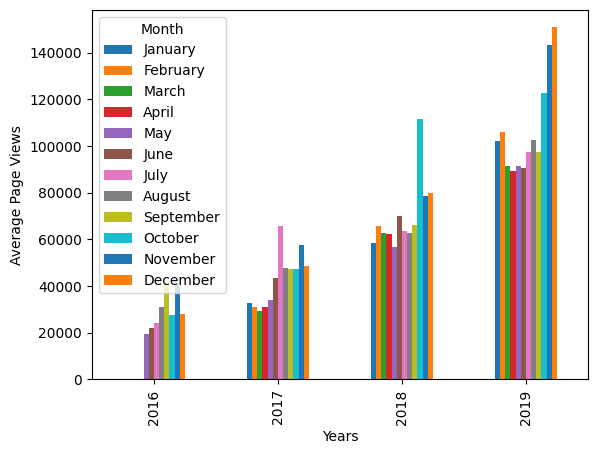

In [4]:
fig, ax = plt.subplots()

month_convert = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
# Copy and modify data for monthly bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean()
df_bar.rename_axis(index=["Year", "Month"], inplace=True)
df_bar = df_bar.reset_index()
df_bar = df_bar.pivot(index="Year", columns="Month", values="value")
df_bar.rename(columns=month_convert, inplace=True)

# Draw bar plot
df_bar.plot(ax=ax, kind="bar", xlabel="Years", ylabel="Average Page Views")
plt.tight_layout()
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

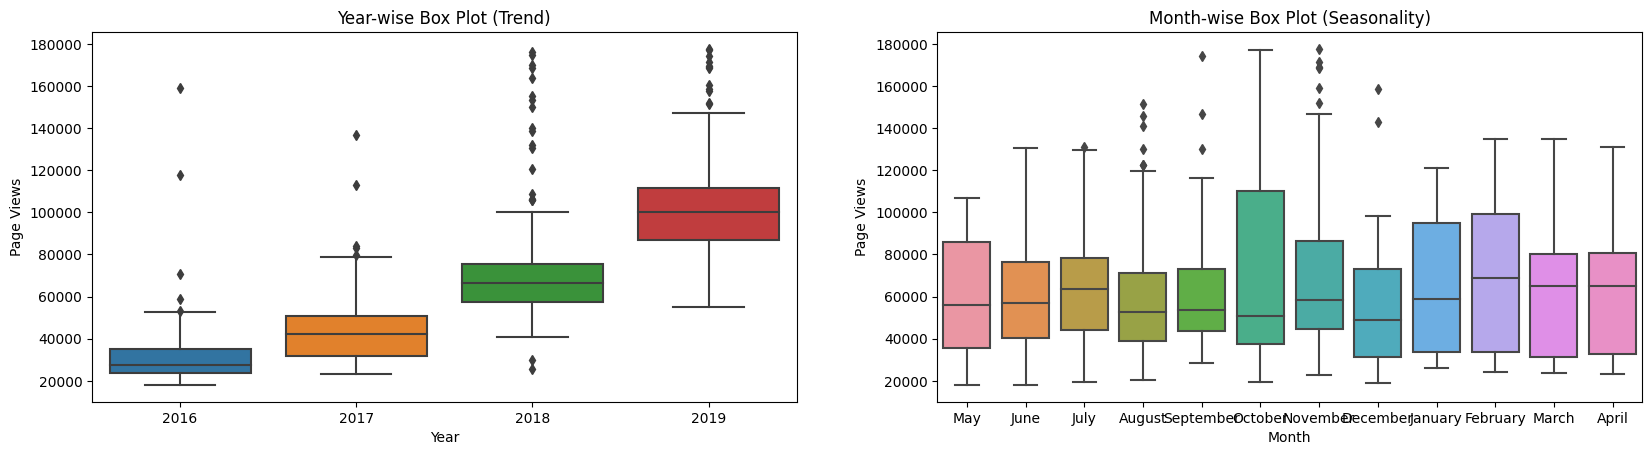

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(20)
print(df.head())
# df_years = df.groupby([df.index.year])
# df_years.reset_index(inplace=True)
sns.boxplot(data=df, ax=ax1, x=df.index.year, y='value')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title("Year-wise Box Plot (Trend)")
# df_years.head()

sns.boxplot(data=df, ax=ax2, x=df.index.month_name(), y='value')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title("Month-wise Box Plot (Seasonality)")

